In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df=pd.read_csv('modified_placement_data.csv')

In [3]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [4]:
# the target column is placement first and it got two values 
df.placement.unique()

array(['Yes', 'No'], dtype=object)

In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [7]:
# lets convert cgpa into float 
df['cgpa']=df['cgpa'].str.replace(',','.').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


## Data preprocessing 

In [9]:
# null values , feature engineering abhi nahi 
# duplicates chk 
# one hot encoding 
# handling outliers and should i do data transformation ? 

In [10]:
# checking null values 
df.isnull().sum()/len(df)*100

cgpa         5.0
iq           0.0
placement    0.0
dtype: float64

In [11]:
# since its only 5% 
mean=df.cgpa.mean()
mean

5.98842105263158

In [12]:
df.fillna(value={'cgpa':mean},inplace=True)

In [13]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [14]:
# now for duplicates 
df.duplicated().sum()

0

In [15]:
# now for ohe 
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [16]:
X=ohe.fit_transform(df.placement.values.reshape(-1,1)).toarray()

In [17]:
X[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [18]:
f_names=ohe.get_feature_names_out(['placement'])
f_names

array(['placement_No', 'placement_Yes'], dtype=object)

In [19]:
encoded_df=pd.DataFrame(X,columns=f_names)

In [20]:
encoded_df.head()

,placement_No,placement_Yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [21]:
#df.drop('placement',axis=1,inplace=True)

In [22]:
df=pd.concat([df,encoded_df],axis=1)
df.head()

,cgpa,iq,placement,placement_No,placement_Yes
0,6.8,123.0,Yes,0.0,1.0
1,5.9,106.0,No,1.0,0.0
2,5.3,121.0,No,1.0,0.0
3,7.4,132.0,Yes,0.0,1.0
4,5.8,142.0,No,1.0,0.0


### EDA 

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [24]:
lst=[1 if i=='Yes' else 0 for i in df.placement]


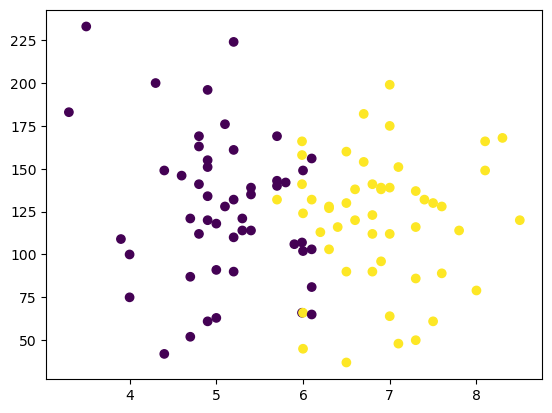

In [25]:
plt.scatter(df['cgpa'],df['iq'],c=lst)

In [26]:
# using logistic regression here cause its sepration is linear 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [27]:
df.drop('placement',axis=1,inplace=True)

In [28]:
X=df.iloc[:,:2]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [29]:
y=df['placement_Yes']


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [31]:
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


In [32]:
clf=LogisticRegression(max_iter=10000,random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [33]:
y_pred=clf.predict(X_test)



In [34]:
print(f"Logistic Regression model accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Logistic Regression model accuracy: 95.00%
